<a href="https://colab.research.google.com/github/Armifara/Deep-Learning/blob/main/Binary_Classification_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification with keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 - Data Ingestion

In [2]:
# Train Data
url_train = 'https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_train.csv'
print (url_train)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_train.csv


In [3]:
import pandas as pd
df = pd.read_csv(url_train)
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### Booking Status is Target Feature
1. 0 - Booking Successful
2. 1 - Booking Cancelled

# Step 2 - Data Quality Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [5]:
df.shape

(42100, 19)

In [6]:
# Missing Values
m = df.isna().sum()
m

,0
id,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
# Dropping the Duplicates
df = df.drop_duplicates(keep='first').reset_index(drop=True)
df.shape

(42100, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

# Step 3 - Separate X & Y (Target Feature --> booking_status)

In [10]:
X = df.drop(columns=["id", "booking_status"])
Y = df["booking_status"]

In [11]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [12]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


# Step 4 - Preprocessing on X

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          42100 non-null  int64  
 1   no_of_children                        42100 non-null  int64  
 2   no_of_weekend_nights                  42100 non-null  int64  
 3   no_of_week_nights                     42100 non-null  int64  
 4   type_of_meal_plan                     42100 non-null  int64  
 5   required_car_parking_space            42100 non-null  int64  
 6   room_type_reserved                    42100 non-null  int64  
 7   lead_time                             42100 non-null  int64  
 8   arrival_year                          42100 non-null  int64  
 9   arrival_month                         42100 non-null  int64  
 10  arrival_date                          42100 non-null  int64  
 11  market_segment_

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691


In [17]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

<Axes: xlabel='booking_status'>

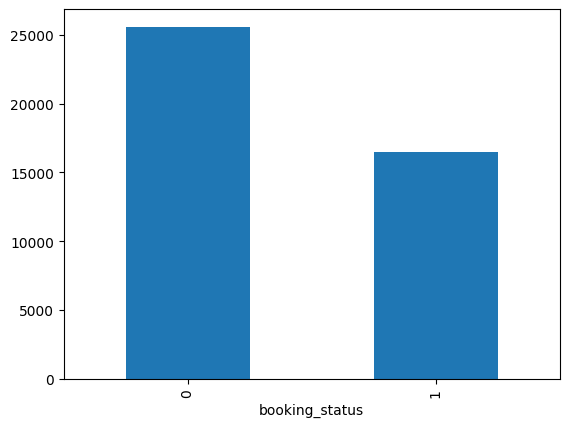

In [18]:
Y.value_counts().plot(kind = 'bar')

# Step 5 - Train Test Validation Split


In [19]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=42, stratify=Y
)

In [20]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
25273,-1.753925,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,1.740654,0.409661,-0.209778,-1.114133,-1.149928,-0.173408,-0.060506,-0.101479,0.146306,-0.737691
17467,0.151040,-0.313454,0.130259,-0.278849,-0.40702,-0.160945,-0.515173,-1.108793,-2.441040,1.203968,-0.326596,-1.149928,-0.173408,-0.060506,-0.101479,-1.774331,-0.737691
23601,0.151040,4.129777,1.259332,-1.680084,-0.40702,-0.160945,3.088017,-1.244481,-2.441040,0.143658,-0.776617,0.428551,-0.173408,-0.060506,-0.101479,1.963816,3.133119
35040,0.151040,1.908162,1.259332,-0.979466,-0.40702,-0.160945,0.685890,0.272757,0.409661,0.497095,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,1.147956,-0.737691
21576,-1.753925,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.158977,0.409661,0.850531,0.235930,0.428551,-0.173408,-0.060506,-0.101479,-0.367982,-0.737691


In [21]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
30007,0.151040,-0.313454,1.259332,-0.278849,-0.407020,-0.160945,-0.515173,1.370596,0.409661,0.143658,0.460940,0.428551,-0.173408,-0.060506,-0.101479,-0.222581,-0.737691
802,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,2.246400,0.409661,0.850531,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.392215,-0.737691
11035,0.151040,-0.313454,-0.998814,-0.979466,1.294624,-0.160945,-0.515173,0.112399,0.409661,0.850531,0.460940,0.428551,-0.173408,-0.060506,-0.101479,0.092454,0.552579
22309,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,-0.307000,0.409661,-0.209778,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.940625,-0.737691
30695,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.297428,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,0.262088,0.552579


In [22]:
ytrain.head()

,booking_status
25273,0
17467,0
23601,0
35040,1
21576,1


In [23]:
ytest.head()

,booking_status
30007,0
802,1
11035,0
22309,1
30695,0


In [24]:
# Splitting Validationa and Train Data
xtrain, xval, ytrain, yval = train_test_split(
    xtrain, ytrain, test_size=0.2, random_state=42, stratify=ytrain
)

In [25]:
xtrain.shape

(26944, 17)

In [26]:
xval.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15841,0.151040,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,-0.405683,0.409661,-0.916652,0.910961,-1.149928,-0.173408,-0.060506,-0.101479,-0.392215,0.552579
36665,0.151040,-0.313454,0.130259,0.421768,-0.40702,-0.160945,-0.515173,0.914191,0.409661,0.143658,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,-0.137764,1.842849
6995,0.151040,-0.313454,0.130259,1.823003,-0.40702,-0.160945,0.685890,-0.960770,0.409661,-1.270088,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,1.051022,-0.737691
28115,0.151040,-0.313454,0.130259,0.421768,-0.40702,-0.160945,-0.515173,2.850828,0.409661,0.850531,-0.326596,-1.149928,-0.173408,-0.060506,-0.101479,-0.661476,-0.737691
13912,-1.753925,-0.313454,0.130259,0.421768,-0.40702,-0.160945,-0.515173,-0.010954,0.409661,-1.270088,-1.339143,-1.149928,-0.173408,-0.060506,-0.101479,-0.661476,-0.737691


In [27]:
yval.head()

,booking_status
15841,0
36665,0
6995,1
28115,0
13912,0


In [28]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
30007,0.151040,-0.313454,1.259332,-0.278849,-0.407020,-0.160945,-0.515173,1.370596,0.409661,0.143658,0.460940,0.428551,-0.173408,-0.060506,-0.101479,-0.222581,-0.737691
802,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,2.246400,0.409661,0.850531,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.392215,-0.737691
11035,0.151040,-0.313454,-0.998814,-0.979466,1.294624,-0.160945,-0.515173,0.112399,0.409661,0.850531,0.460940,0.428551,-0.173408,-0.060506,-0.101479,0.092454,0.552579
22309,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,-0.307000,0.409661,-0.209778,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.940625,-0.737691
30695,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.297428,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,0.262088,0.552579


In [29]:
xtrain.shape[1]

17

# Step 6 - Train the Neural Network

# Step 6 - Build the Neural Network
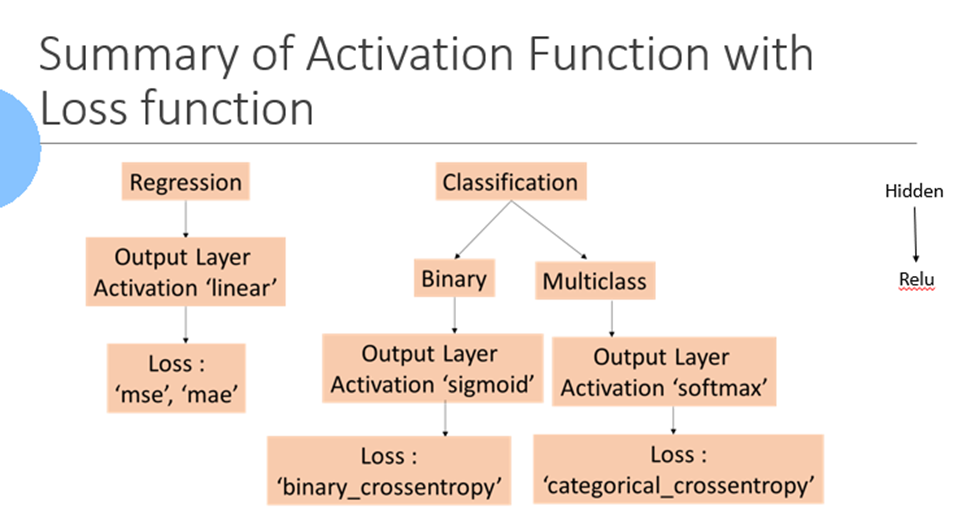

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.2),
        Dense(1, activation="sigmoid")
    ]
)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# After Building the Model, it has to be compiled as well
model.compile(
    # Best Optimizer is adam, can be used for all models
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [34]:
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [35]:
hist = model.fit(
    xtrain,
    ytrain,
    epochs=100,
    batch_size=32,
    validation_data=(xval, yval),
    callbacks=[es]
)

Epoch 1/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6995 - loss: 0.6223 - val_accuracy: 0.7732 - val_loss: 0.5121
Epoch 2/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7771 - loss: 0.5151 - val_accuracy: 0.7812 - val_loss: 0.4926
Epoch 3/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7761 - loss: 0.5005 - val_accuracy: 0.7858 - val_loss: 0.4822
Epoch 4/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7826 - loss: 0.4857 - val_accuracy: 0.7841 - val_loss: 0.4798
Epoch 5/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7842 - loss: 0.4821 - val_accuracy: 0.7904 - val_loss: 0.4743
Epoch 6/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7941 - loss: 0.4774 - val_accuracy: 0.7877 - val_loss: 0.4719
Epoch 7/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7913 - loss: 0.4695 - val_accuracy: 0.7861 - val_loss: 0.4710
Epoch 8/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7887 - loss: 0.4769 - val_accu

# Plot the Learning Curve

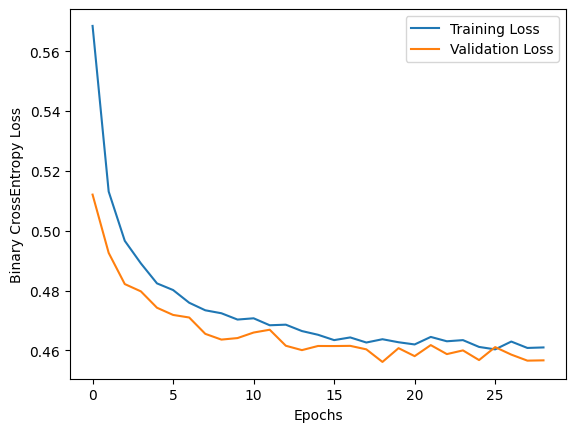

In [36]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary CrossEntropy Loss")
plt.legend()
plt.show()

In [37]:
model.evaluate(xtrain,ytrain)

842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8038 - loss: 0.4472


[0.4488025903701782, 0.8020709753036499]

In [38]:
model.evaluate(xval,yval)

211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7885 - loss: 0.4630


[0.456181138753891, 0.7936460971832275]

In [39]:
model.evaluate(xtest,ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8019 - loss: 0.4536


[0.45180603861808777, 0.7977434396743774]

In [53]:
yprob_val = model.predict(xval)
yprob_val[0:5]

211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.06409694],
       [0.49691224],
       [0.7390283 ],
       [0.57908887],
       [0.21438846]], dtype=float32)

In [54]:
thr = 0.5
ypred_train = (yprob_val>= thr).astype(int).flatten()
ypred_train

array([0, 0, 1, ..., 0, 1, 0])

# Tuning the Threshold on Validation Data

In [55]:
import numpy as np
thresholds = np.arange(0.01, 1.01, 0.01)
thresholds

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [52]:
from sklearn.metrics import f1_score
best_thr = 0.5
best_f1 = 0
for thr in thresholds:
    ypred_val = (yprob_val>= thr).astype(int).flatten()
    f1 = f1_score(yval, ypred_val, average = 'macro')
    if f1 > best_f1:
        best_f1 = f1
        best_thr = thr

print(f"Best Threshold: {best_thr}")
print(f"Best F1 Score: {best_f1}")

Best Threshold: 0.48000000000000004
Best F1 Score: 0.7817727634621666


In [57]:
best_thr

np.float64(0.48000000000000004)

In [59]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.8970521 ],
       [0.74968636],
       [0.46134135],
       [0.7934383 ],
       [0.389397  ]], dtype=float32)

In [60]:
ypred_test = (yprob_test>= best_thr).astype(int).flatten()
ypred_test

array([1, 1, 0, ..., 1, 0, 0])

# Model Evaluation

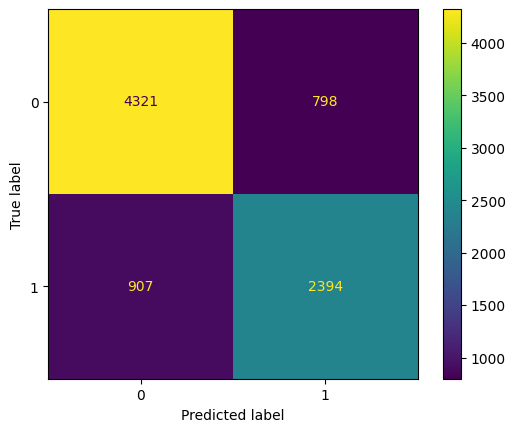

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      5119
           1       0.75      0.73      0.74      3301

    accuracy                           0.80      8420
   macro avg       0.79      0.78      0.79      8420
weighted avg       0.80      0.80      0.80      8420



# Out of Sample Prediction

In [63]:
url_test = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_test.csv"
print(url_test)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_test.csv


In [64]:
xnew = pd.read_csv(url_test)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [65]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [66]:
xnew2 = xnew.drop(columns=["id"])
xnew2

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [67]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [76]:
probs = model.predict(xnew_pre).round(2)
probs[0:5]

878/878 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.08],
       [0.04],
       [0.41],
       [0.17],
       [0.66]], dtype=float32)

In [77]:
best_thr

np.float64(0.48000000000000004)

In [78]:
preds = (probs>= best_thr).astype(int).flatten()
preds

array([0, 0, 0, ..., 0, 1, 1])

In [79]:
res = xnew[['id']]
res ['booking_status'] = preds
res ['probs'] = probs
res

,id,booking_status,probs
0,42100,0,0.08
1,42101,0,0.04
2,42102,0,0.41
3,42103,0,0.17
4,42104,1,0.66
...,...,...,...
28063,70163,1,0.98
28064,70164,0,0.05
28065,70165,0,0.14
28066,70166,1,0.63


<Axes: xlabel='booking_status'>

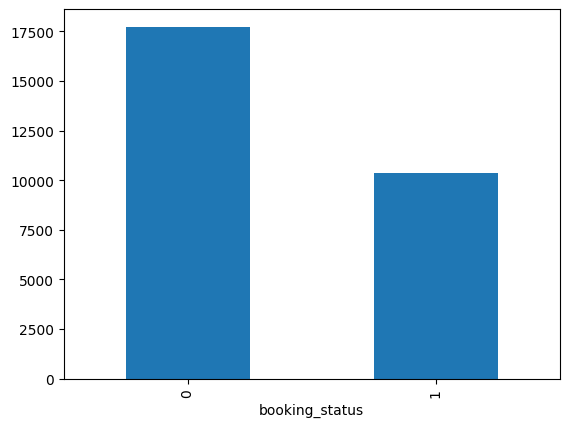

In [80]:
res ['booking_status'].value_counts().plot(kind='bar')

In [81]:
res.to_csv("results.csv", index=False)

# Save and Load

### Save

In [82]:
import joblib
joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [83]:
model.save("booking_model.keras")

### Load

In [84]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [85]:
from tensorflow.keras.models import load_model

m = load_model("booking_model.keras")
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)

In [86]:
m.evaluate(xtest, ytest)

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8019 - loss: 0.4536


[0.45180603861808777, 0.7977434396743774]